In [1]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet("PISA_2022.parquet")

In [3]:
column_names_list = df.columns.tolist()

print(column_names_list)

['CNT', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'CYC', 'NatCen', 'STRATUM', 'SUBNATIO', 'REGION', 'OECD', 'ADMINMODE', 'LANGTEST_QQQ', 'LANGTEST_COG', 'LANGTEST_PAQ', 'Option_CT', 'Option_FL', 'Option_ICTQ', 'Option_WBQ', 'Option_PQ', 'Option_TQ', 'Option_UH', 'BOOKID', 'ST001D01T', 'ST003D02T', 'ST003D03T', 'ST004D01T', 'ST250Q01JA', 'ST250Q02JA', 'ST250Q03JA', 'ST250Q04JA', 'ST250Q05JA', 'ST250D06JA', 'ST250D07JA', 'ST251Q01JA', 'ST251Q02JA', 'ST251Q03JA', 'ST251Q04JA', 'ST251Q06JA', 'ST251Q07JA', 'ST251D08JA', 'ST251D09JA', 'ST253Q01JA', 'ST254Q01JA', 'ST254Q02JA', 'ST254Q03JA', 'ST254Q04JA', 'ST254Q05JA', 'ST254Q06JA', 'ST255Q01JA', 'ST256Q01JA', 'ST256Q02JA', 'ST256Q03JA', 'ST256Q06JA', 'ST256Q07JA', 'ST256Q08JA', 'ST256Q09JA', 'ST256Q10JA', 'ST230Q01JA', 'ST005Q01JA', 'ST006Q01JA', 'ST006Q02JA', 'ST006Q03JA', 'ST006Q04JA', 'ST006Q05JA', 'ST007Q01JA', 'ST008Q01JA', 'ST008Q02JA', 'ST008Q03JA', 'ST008Q04JA', 'ST008Q05JA', 'ST258Q01JA', 'ST259Q01JA', 'ST259Q02JA', 'ST019AQ01T', 'ST019BQ01

In [4]:
column_rename_map = {
    'ST297Q01JA': 'one-on-one',
    'ST297Q03JA': 'ICT',
    'ST297Q05JA': 'video',
    'ST297Q06JA': 'small_group',
    'ST297Q07JA': 'large_group',
    'ST297Q09JA': 'none',
}

# Renaming the columns
df.rename(columns=column_rename_map, inplace=True)

In [5]:
columns_for_clustering = ["one-on-one", "ICT", "video", "small_group", "large_group", "none"]
X = df[columns_for_clustering]

In [6]:
X.head()

,one-on-one,ICT,video,small_group,large_group,none
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0


C:\Users\borbr\AppData\Local\Temp\ipykernel_4252\1879384714.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=yes_counts.index, y=yes_counts.values, palette='viridis')


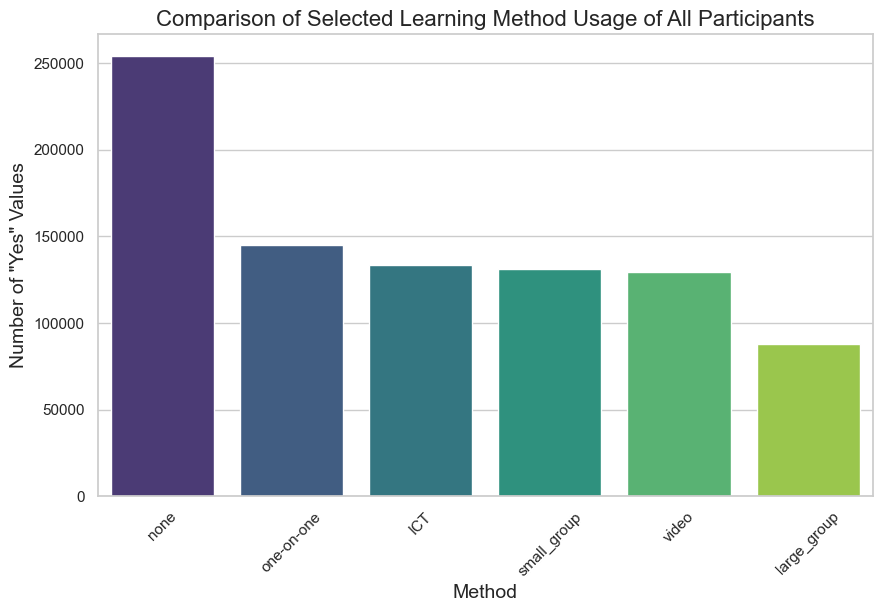

In [7]:
# Define the specific columns to visualize
columns_for_visualization = ['one-on-one', 'ICT', 'video', 'small_group', 'large_group', 'none']

# Filter the dataframe to include only the specified columns
df_filtered = df[columns_for_visualization]

# Convert all columns to numeric, coercing errors to NaN (if needed)
df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if any conversion failed
df_filtered.dropna(inplace=True)

# Calculate the count of '1's for each learning method in the filtered dataframe
yes_counts = df_filtered.sum().sort_values(ascending=False)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot for the counts of '1's
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=yes_counts.index, y=yes_counts.values, palette='viridis')

# Set plot title and labels
ax.set_title('Comparison of Selected Learning Method Usage of All Participants', fontsize=16)
ax.set_xlabel('Method', fontsize=14)
ax.set_ylabel('Number of "Yes" Values', fontsize=14)

# Display the plot
plt.xticks(rotation=45)  # Rotate labels if needed for better visibility
plt.show()

In [8]:
def plot_learning_methods(df, columns, palette):
    # Filter the dataframe to include only the specified columns
    df_filtered = df[columns]

    # Convert all columns to numeric, coercing errors to NaN (if needed)
    df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')

    # Drop rows with NaN values if any conversion failed
    df_filtered.dropna(inplace=True)

    # Calculate the count of '1's for each learning method in the filtered dataframe
    yes_counts = df_filtered.sum().sort_values(ascending=False)

    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    # Create a bar plot for the counts of '1's
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=yes_counts.index, y=yes_counts.values, palette=[palette[col] for col in yes_counts.index])

    # Set plot title and labels
    ax.set_title('Comparison of Selected Learning Method Usage of All Participants', fontsize=16)
    ax.set_xlabel('Method', fontsize=14)
    ax.set_ylabel('Number of "Yes" Values', fontsize=14)

    # Display the plot
    plt.xticks(rotation=45)  # Rotate labels if needed for better visibility
    plt.show()

# Generate a nicer color palette using seaborn
nicer_palette = sns.color_palette("Set2", len(columns_for_visualization))

# Map the nicer palette to the columns
color_palette = dict(zip(columns_for_visualization, nicer_palette))


C:\Users\borbr\AppData\Local\Temp\ipykernel_4252\1869436837.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=yes_counts.index, y=yes_counts.values, palette=[palette[col] for col in yes_counts.index])


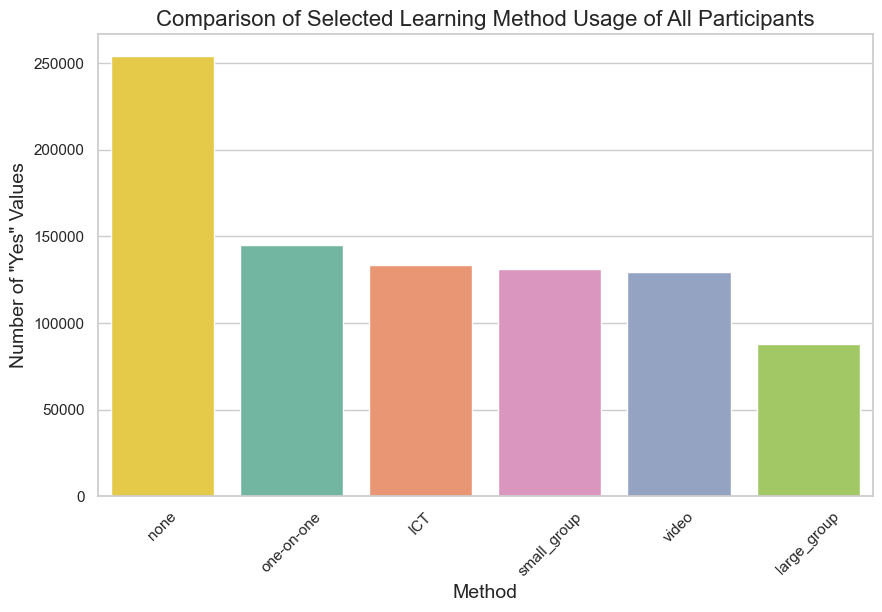

In [9]:
plot_learning_methods(df, columns_for_visualization, color_palette)

In [12]:
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if any conversion failed
X.dropna(inplace=True)

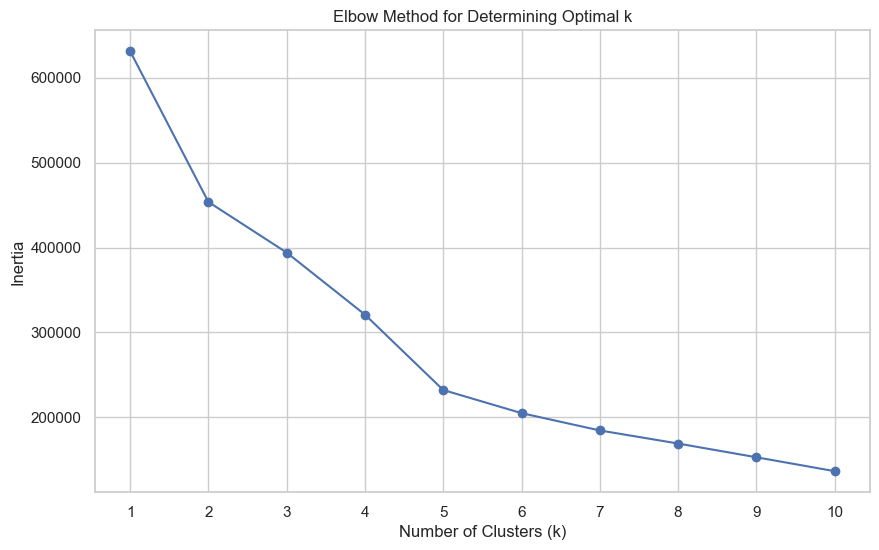

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [14]:
"""from sklearn.metrics import silhouette_score

# Silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()
"""

KeyboardInterrupt: 

         one-on-one       ICT     video  small_group  large_group      none
Cluster                                                                    
0          0.031273  0.035411  0.035833     0.039616     0.016691  1.000000
1          0.295767  0.261766  0.245478     0.234363     0.114028  0.012046
2          0.865406  0.833276  0.853376     0.930263     0.925747  0.706407


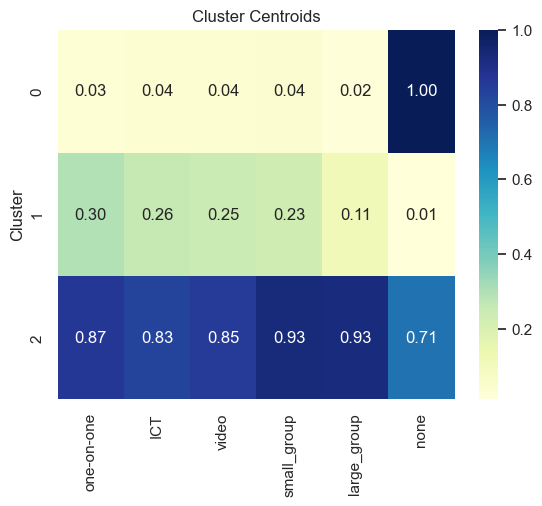

In [17]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X)
clusters = kmeans.labels_
X['Cluster'] = clusters
# Viewing the mean values of each cluster
cluster_means = X.groupby('Cluster').mean()
print(cluster_means)
import seaborn as sns
# Heatmap of the cluster centroids
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Cluster Centroids')
plt.show()